In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

from oak_cli.utils.logging import logger
from oak_cli.evaluation.machine.main import EVALUATION_CSV

In [18]:
if not EVALUATION_CSV.exists():
    logger.error(f"{EVALUATION_CSV} does not exist yet!")
    sys.exit(1)

In [19]:
sns.set_style("whitegrid")

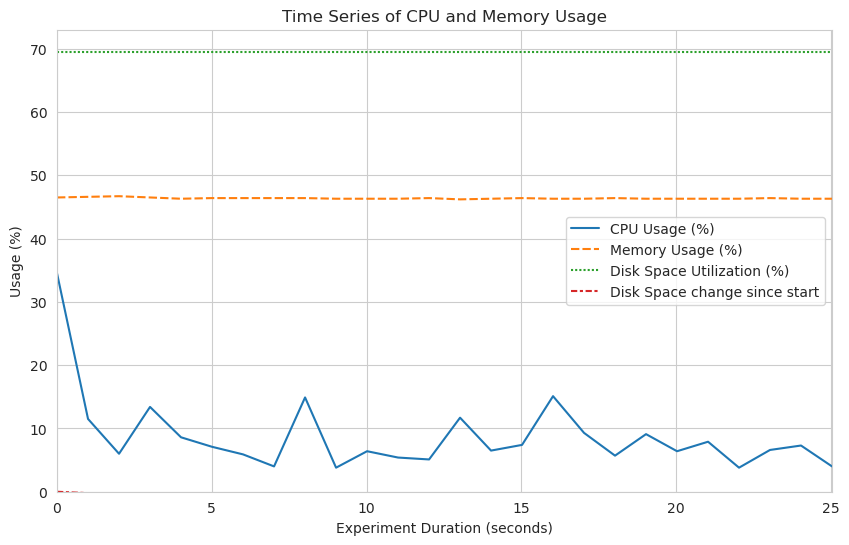

In [20]:
# Load the CSV file into a DataFrame
df = pd.read_csv(EVALUATION_CSV)
df.set_index("Time since experiment start", inplace=True)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=df[["CPU Usage (%)", "Memory Usage (%)", "Disk Space Utilization (%)", "Disk Space change since start"]])
#sns.lineplot(data=df[["CPU Usage (%)", "Memory Usage (%)"]])
plt.title("Time Series of CPU and Memory Usage")
plt.xlabel("Experiment Duration (seconds)")
plt.ylabel("Usage (%)")

# Start axes at 0
plt.xlim([0, max(df.index)])
plt.ylim(bottom=0)

plt.show()